# Decision Tree Assignment

## Dataset - Company_data

## Objective:-A cloth manufacturing company is interested to know about the segment or attributes causes high sale.  

### Importing importance libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# load the dataset
company=pd.read_csv("Company_Data.csv")

In [3]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


### Checking of null values and data types

In [5]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


### Duplicate value check

In [6]:
company[company.duplicated(keep = False)]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


### Checking for Outliers

C:\Users\tanma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tanma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tanma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tanma\anaconda3\lib\si

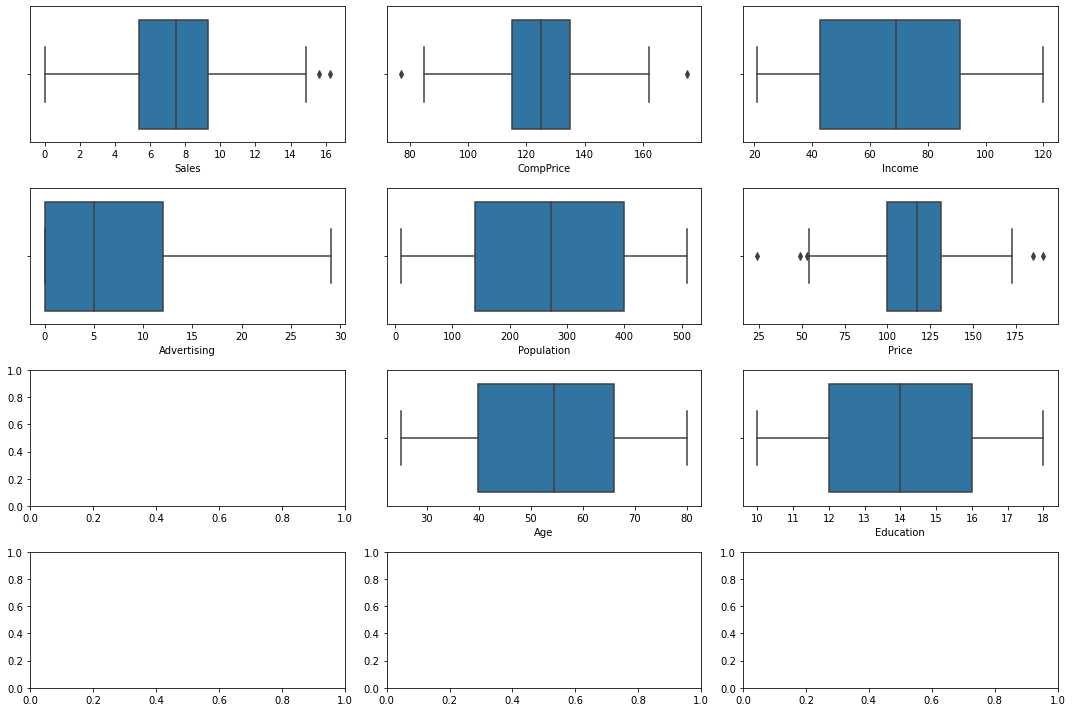

In [7]:
import seaborn as sns
fig, ax = plt.subplots(4, 3, figsize=(15,10))
sns.boxplot(company.Sales, ax=ax[0,0])
sns.boxplot(company.CompPrice, ax=ax[0,1])
sns.boxplot(company.Income, ax=ax[0,2])
sns.boxplot(company.Advertising, ax=ax[1,0])
sns.boxplot(company.Population, ax=ax[1,1])
sns.boxplot(company.Price, ax=ax[1,2])

sns.boxplot(company.Age, ax=ax[2,1])
sns.boxplot(company.Education, ax=ax[2,2])

plt.tight_layout()
plt.show()

In [8]:
#We will take high sales above at 7.49 beacause it is the average of sales
company["sales"]=(company["Sales"]>7.49)*1

In [9]:
#We will create numerical variable for categorical data
label_encoder = preprocessing.LabelEncoder()
company['ShelveLoc']= label_encoder.fit_transform(company['ShelveLoc']) 
company['Urban']= label_encoder.fit_transform(company['Urban']) 
company['US']= label_encoder.fit_transform(company['US']) 

In [10]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,0


In [11]:
company.drop(["Sales"],axis=1,inplace=True)

In [12]:
x=company.iloc[:,0:10]
y=company.iloc[:,10]

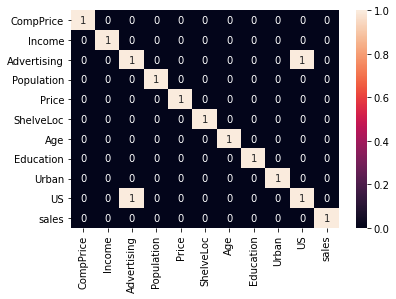

In [13]:
# checking correlation using heatmap
sns.heatmap(company.corr()>0.6, annot = True)
plt.show()

<AxesSubplot:>

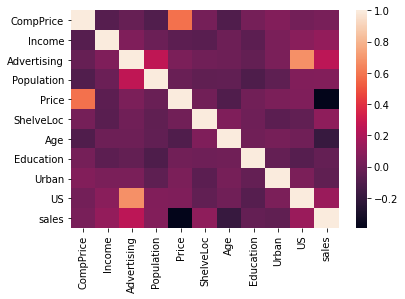

In [14]:
# correlation matrix
sns.heatmap(company.corr())

In [15]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [16]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

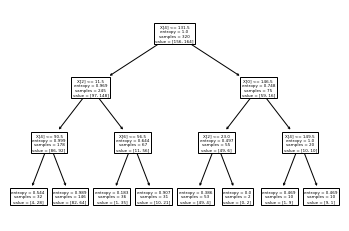

In [17]:
#PLot the decision tree
tree.plot_tree(model);

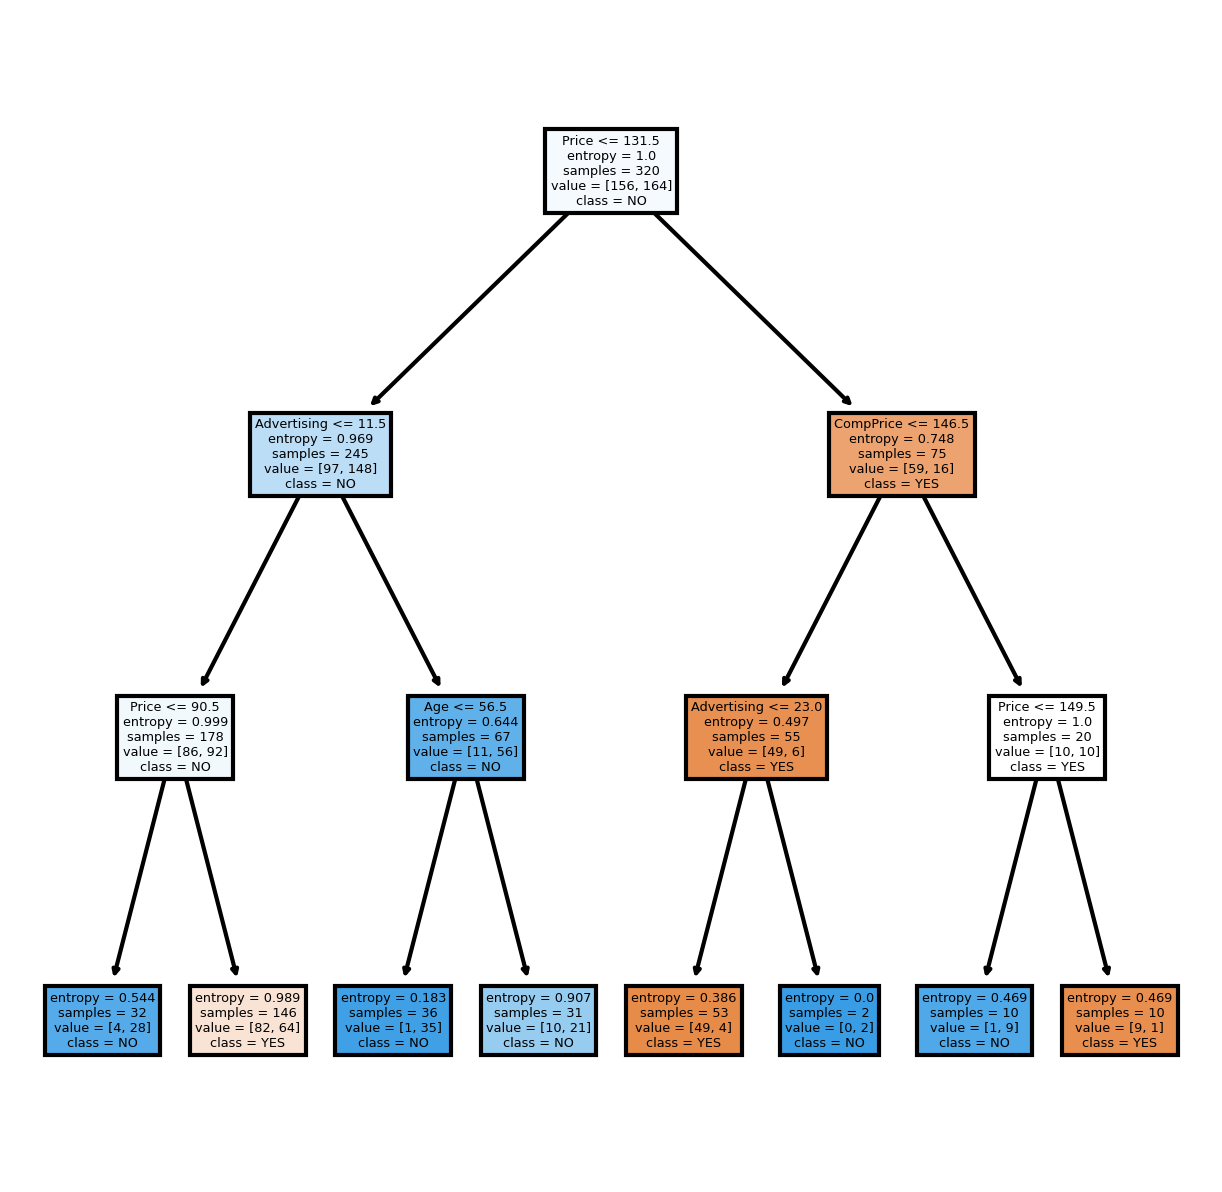

In [18]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US','income']
cn=['YES','NO']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [19]:
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.734375

In [21]:
preds = model.predict(x_test)

In [22]:
np.mean(preds==y_test)

0.6875

In [27]:
model.score(x_test, y_test)

0.6875

In [28]:
model.feature_importances_

array([0.09347606, 0.        , 0.24760644, 0.        , 0.56857913,
       0.        , 0.09033836, 0.        , 0.        , 0.        ])

In [29]:
y_pred = model.predict(x_test)

In [30]:
#Here first column is for 'Good', & second is for 'Risky'
model.predict_proba(x_test)

array([[0.9245283 , 0.0754717 ],
       [0.56164384, 0.43835616],
       [0.9       , 0.1       ],
       [0.56164384, 0.43835616],
       [0.56164384, 0.43835616],
       [0.1       , 0.9       ],
       [0.02777778, 0.97222222],
       [0.125     , 0.875     ],
       [0.56164384, 0.43835616],
       [0.32258065, 0.67741935],
       [0.9245283 , 0.0754717 ],
       [0.56164384, 0.43835616],
       [0.56164384, 0.43835616],
       [0.125     , 0.875     ],
       [0.56164384, 0.43835616],
       [0.56164384, 0.43835616],
       [0.02777778, 0.97222222],
       [0.56164384, 0.43835616],
       [0.56164384, 0.43835616],
       [0.9245283 , 0.0754717 ],
       [0.125     , 0.875     ],
       [0.56164384, 0.43835616],
       [0.56164384, 0.43835616],
       [0.02777778, 0.97222222],
       [0.9245283 , 0.0754717 ],
       [0.56164384, 0.43835616],
       [0.56164384, 0.43835616],
       [0.56164384, 0.43835616],
       [0.1       , 0.9       ],
       [0.56164384, 0.43835616],
       [0.

In [31]:

# confusion matrix

from sklearn.metrics import confusion_matrix, classification_report
cm= confusion_matrix(y_test, y_pred) 
cm

array([[38,  7],
       [18, 17]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 0.6875')

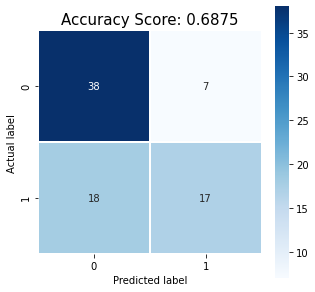

In [32]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

In [33]:
# Predicting the values of test data
y_pred = model.predict(x_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.68      0.84      0.75        45
           1       0.71      0.49      0.58        35

    accuracy                           0.69        80
   macro avg       0.69      0.67      0.66        80
weighted avg       0.69      0.69      0.68        80



In [34]:
train_accuracy = []
test_accuracy = []
for max_depth in range(1,11):
    model = DecisionTreeClassifier(criterion='entropy', max_depth= max_depth, random_state= 40)
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))

In [35]:
accuracies = pd.DataFrame({'max_depth':range(1,11),'train_acc':train_accuracy, 'test_acc':test_accuracy})
accuracies

,max_depth,train_acc,test_acc
0,1,0.646875,0.5875
1,2,0.646875,0.5875
2,3,0.734375,0.6875
3,4,0.784375,0.6750
4,5,0.821875,0.6625
5,6,0.909375,0.6875
6,7,0.918750,0.6625
7,8,0.946875,0.6750
8,9,0.962500,0.7250
9,10,0.987500,0.6500


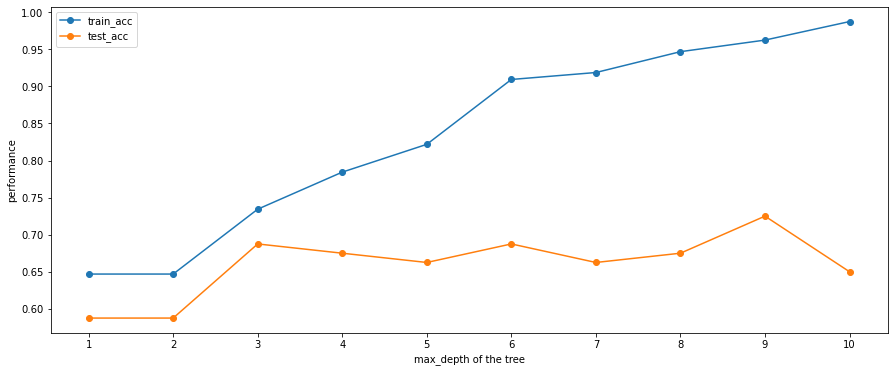

In [36]:
# visulizing accuracy graph to look over max_depth
labels =['train_acc','test_acc']
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
plt.plot(accuracies['max_depth'],accuracies['train_acc'], marker = 'o')
plt.plot(accuracies['max_depth'], accuracies['test_acc'], marker = 'o')
ax.set_xticks(np.arange(1,11))
plt.legend(labels)
plt.xlabel('max_depth of the tree')
plt.ylabel('performance')
plt.show()

In [37]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [39]:
array = company.values
X = array[:,0:10]
y = array[:,10]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)

In [41]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [42]:
#Find the accuracy
model.score(X_test,y_test)

-0.6982456140350879

# Conclusion:-We can see maximum depth of tree 3 is good as accuracy prospective & classsification is good technique for predict the sale & regression is not usual  to good at this dataset 